In [7]:
import xarray as xr
import xesmf as xe
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy

import rasterio
import glob
import sys
import pickle


In [8]:
run ../util/setupConsole_su

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# dirChirts = '/dartfs-hpc/rc/lab/C/CMIG/CHIRTS'
dirChirts = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/CHIRTS'

In [17]:
hi_ds = xr.open_mfdataset('%s/HeatIndex/netcdf/hi_*.nc'%dirChirts)

In [23]:
hi_ds_us = hi_ds.sel(lat=slice(44,40), lon=slice(255,260))

In [24]:
hi_ds_us

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 100, time: 12419)
Coordinates:
  * lat      (lat) float64 43.99 43.94 43.89 43.84 ... 40.19 40.14 40.09 40.04
  * lon      (lon) float64 255.0 255.1 255.1 255.2 ... 259.8 259.9 259.9 260.0
  * time     (time) datetime64[ns] 1983-01-01 1983-01-02 ... 2016-12-31
Data variables:
    hi       (lat, lon, time) float64 dask.array<chunksize=(80, 100, 31), meta=np.ndarray>
Attributes:
    units:    degC
    name:     CHIRTS-HEAT-INDEX

In [25]:
hi_ds_us.load()

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 100, time: 12419)
Coordinates:
  * lat      (lat) float64 43.99 43.94 43.89 43.84 ... 40.19 40.14 40.09 40.04
  * lon      (lon) float64 255.0 255.1 255.1 255.2 ... 259.8 259.9 259.9 260.0
  * time     (time) datetime64[ns] 1983-01-01 1983-01-02 ... 2016-12-31
Data variables:
    hi       (lat, lon, time) float64 17.41 13.69 24.63 ... 31.88 35.27 31.67
Attributes:
    units:    degC
    name:     CHIRTS-HEAT-INDEX

In [30]:
hi_ds_us_ts = hi_ds_us.hi.mean(dim='lat').mean(dim='lon').resample(time='1Y').max()

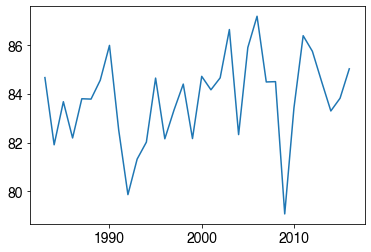

In [32]:
plt.plot(range(1983, 2016+1), hi_ds_us_ts.values)

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -67, 23, 46])

v1 = 50
v2 = 120
vstep = 5
vlabelstep = 10

midnorm = MidpointNormalize(vmin=v1, vcenter=(v1+v2)/2, vmax=v2)
cmap = plt.cm.get_cmap('Reds')
c = plt.contourf(hi_ds.lon, hi_ds.lat, hi_ds.hi.max(dim='time'), cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep))
# plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
scmap.set_array([])
cb = plt.colorbar(scmap, ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal',
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
# cb.set_label('CMIP6 ensemble median TXx trend\n($\degree$C/decade, 1979-2015)', fontsize=20)

# if wxData == 'gldas':
#     plt.savefig('obs-gdd-trend-cpc.png', format='png', dpi=200, bbox_inches = 'tight', pad_inches = 0)
# elif wxData == 'era5':
#     plt.savefig('obs-gdd-trend-era5.png', format='png', dpi=200, bbox_inches = 'tight', pad_inches = 0)

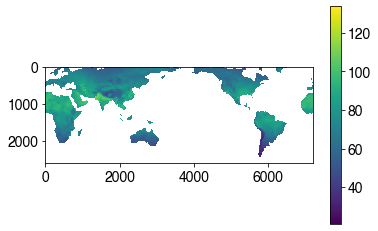

In [15]:
plt.imshow(hi_ds.hi.mean(dim='time').values); plt.colorbar()